In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [95]:
#load data
dna_meth = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/G5_lung_dna-meth.csv')
gene_exp = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/G5_lung_gene-expr.csv')




In [96]:
clin_features = ['Label']
for col in clin_features:
    print('---------------------gene expression--------------------------')
    print(gene_exp[col].value_counts())

# we have 501 tumor samples and 51 normal samples in gene expression data

clin_features = ['Label']
for col in clin_features:
    print('---------------------cpg islands--------------------------')
    print(dna_meth[col].value_counts())

# 370 tumour and 42 normal for dna methylation

---------------------gene expression--------------------------
Label
Primary Tumor          501
Solid Tissue Normal     51
Name: count, dtype: int64
---------------------cpg islands--------------------------
Label
Primary Tumor          370
Solid Tissue Normal     42
Name: count, dtype: int64


In [97]:
#describe the data

print(gene_exp[clin_features].describe())
print()
print(dna_meth[clin_features].describe())

                Label
count             552
unique              2
top     Primary Tumor
freq              501

                Label
count             412
unique              2
top     Primary Tumor
freq              370


In [98]:
gene_exp['Label'].values

array(['Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tum

In [99]:
# Convert features to numeric



df = gene_exp
df

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.18.3406.01,Primary Tumor,0.0,75.3622,25.4252,279.9764,1510.2362,0.0,23.6220,0.0000,...,75.5906,403.9370,428.3465,2.3622,986.6142,1914.9606,265.3543,738.5827,7.0866,0.0000
1,TCGA.18.3407.01,Primary Tumor,0.0,14.4148,6.9933,198.2540,968.6013,0.0,301.6175,0.0000,...,42.8164,303.9962,1270.2188,5.7088,854.4244,4221.6936,702.6641,960.9895,11.4177,0.4757
2,TCGA.18.3408.01,Primary Tumor,0.0,8.4888,3.3754,254.5929,1474.1213,0.0,49.2362,1.7796,...,51.0159,377.2801,944.9800,8.3049,643.0372,526.1753,589.6485,757.5263,5.9321,18.3894
3,TCGA.18.3409.01,Primary Tumor,0.0,2.5897,7.1538,164.3744,944.6154,0.0,93.3333,1.0256,...,86.6667,616.9231,1090.2564,1.5385,1168.2051,4388.2051,807.1795,1008.7179,48.2051,0.0000
4,TCGA.18.3410.01,Primary Tumor,0.0,16.6653,19.5722,200.8033,1156.0568,0.0,120.9232,0.0000,...,40.5703,239.8769,1036.3153,161.8873,711.7529,3029.7749,735.7800,884.2752,5.5144,7.8777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,TCGA.O2.A52S.01,Primary Tumor,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,...,65.3974,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417
548,TCGA.O2.A52V.01,Primary Tumor,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,...,52.9467,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000
549,TCGA.O2.A52W.01,Primary Tumor,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,...,45.1370,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000
550,TCGA.O2.A5IB.01,Primary Tumor,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,...,91.3206,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000


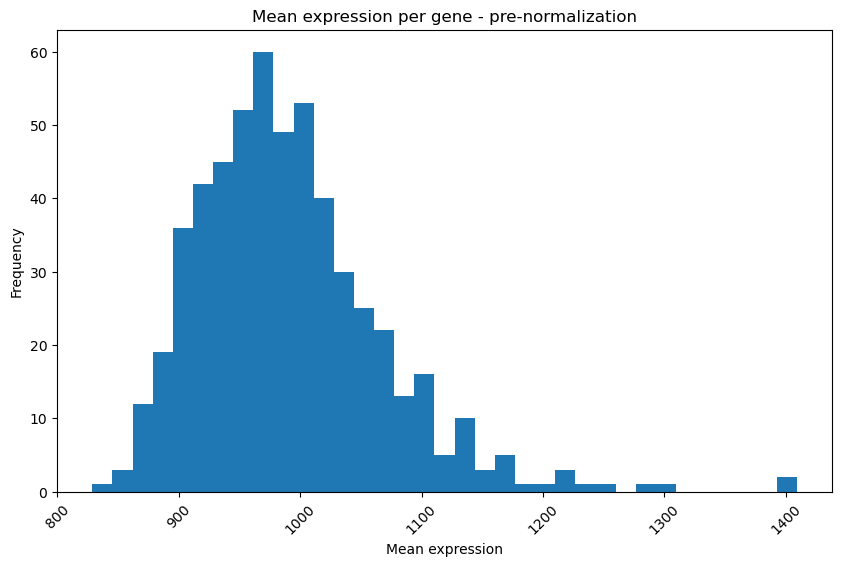

In [130]:

#change tissue type into a numeric value
# bool_label = [1 if value == 'Primary Tumor' else 0 for value in df['Label'].values]


#removed this because it's not actually useful in the prediction


column_means = df.iloc[:,2:].mean(axis=1)
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(column_means.values, bins=35)
plt.title('Mean expression per gene - pre-normalization')
plt.xlabel('Mean expression')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()








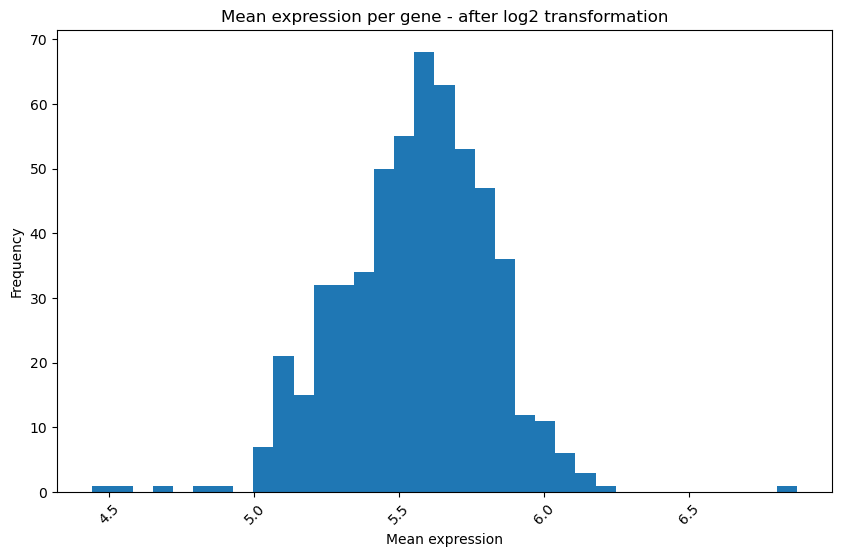

In [131]:
new_df = df.iloc[:, 2:].copy()
new_df = new_df.replace(0, 0.01)
# print(new_df)
log_df = np.where(new_df == 0, 0.01, new_df)
log_df = np.log2(log_df)

column_means = log_df.mean(axis=1)
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(column_means, bins=35)
plt.title('Mean expression per gene - after log2 transformation')
plt.xlabel('Mean expression')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()

In [63]:
# df['Boolean_label'] = bool_label
# df['Boolean_label'].value_counts()

#### 1 is tumour sample, 0 is normal tissue

In [64]:
simple_tissue = []
tissue_num = []
for s in df['Label'].values:
    if 'Primary' in s:
        tissue_num.append(1)
        simple_tissue.append('Primary Tumor')
    else:
        tissue_num.append(0)
        simple_tissue.append('Solid Tissue Normal')

        

df['tissue_numeric'] = tissue_num
df['tissue'] = simple_tissue

In [65]:
df['tissue'].value_counts()
#checking that the same number of samples are in each tissue type

tissue
Primary Tumor          501
Solid Tissue Normal     51
Name: count, dtype: int64

In [66]:
#####NOW WE DO RANDOM FOREST######

numeric_only = df.select_dtypes(include=['number'])
numeric_only = numeric_only.drop(columns=['tissue_numeric']) #dropping this because the sample being cancer or not is not a feature for selection, only for identification later
numeric_only

X = df[numeric_only.columns]
feature_names = X.columns.tolist()
print(feature_names)

['..100130426', '..100133144', '..100134869', '..10357', '..10431', '..136542', '..155060', '..26823', '..280660', '..317712', '..340602', '..388795', '..390284', '..391343', '..391714', '..404770', '..441362', '..442388', '..553137', '..57714', '..645851', '..652919', '..653553', '..728045', '..728603', '..728788', '..729884', '..8225', '..90288', 'A1BG.1', 'A1CF.29974', 'A2BP1.54715', 'A2LD1.87769', 'A2ML1.144568', 'A2M.2', 'A4GALT.53947', 'A4GNT.51146', 'AAA1.404744', 'AAAS.8086', 'AACSL.729522', 'AACS.65985', 'AADACL2.344752', 'AADACL3.126767', 'AADACL4.343066', 'AADAC.13', 'AADAT.51166', 'AAGAB.79719', 'AAK1.22848', 'AAMP.14', 'AANAT.15', 'AARS2.57505', 'AARSD1.80755', 'AARS.16', 'AASDHPPT.60496', 'AASDH.132949', 'AASS.10157', 'AATF.26574', 'AATK.9625', 'ABAT.18', 'ABCA10.10349', 'ABCA11P.79963', 'ABCA12.26154', 'ABCA13.154664', 'ABCA17P.650655', 'ABCA1.19', 'ABCA2.20', 'ABCA3.21', 'ABCA4.24', 'ABCA5.23461', 'ABCA6.23460', 'ABCA7.10347', 'ABCA8.10351', 'ABCA9.10350', 'ABCB10.23456

In [67]:
y = df['tissue'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
encoded_Y = labelencoder.fit_transform(y)

#check example
print(y[:50])
print (encoded_Y[:50])

['Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [68]:
from sklearn.model_selection import train_test_split

print (f'Original X shape is {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=42)

print (f'X train shape is    {X_train.shape}')
print (f'y train shape is    {y_train.shape}')
print (f'X test shape is     {X_test.shape}')
print (f'y test shape is     {y_test.shape}')

Original X shape is (552, 20531)
X train shape is    (369, 20531)
y train shape is    (369,)
X test shape is     (183, 20531)
y test shape is     (183,)


In [69]:
X_train

,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,..280660,..317712,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
57,0.3459,24.1472,13.8318,135.9037,566.2937,0.0,115.6324,0.3391,0.0000,0.0,...,64.7677,355.7138,1577.8230,2.3737,551.3733,5239.7423,1507.6297,554.4252,98.6775,0.0000
470,0.0000,2.3871,9.2258,91.9097,703.8710,0.0,283.8710,0.0000,0.0000,0.0,...,24.5161,180.6452,1064.5161,87.0968,576.7742,4175.4839,1007.7419,420.6452,19.3548,0.0000
24,0.0000,5.0784,8.9417,177.7704,1034.7581,0.0,241.8460,0.3894,0.0000,0.0,...,79.8364,489.9231,1048.3887,1.5578,732.1585,3699.3477,1145.3607,943.6277,589.2318,0.0000
17,0.0000,30.4765,16.6024,245.4566,999.4328,0.0,68.3494,0.0000,0.0000,0.0,...,49.6313,367.8389,2826.7158,129.6086,856.2110,1745.8877,1184.0613,1608.0545,4.2541,0.0000
402,0.0000,34.6506,18.1075,306.5380,625.2975,0.0,202.3156,0.0000,6.4227,0.0,...,21.1032,230.7591,1190.4967,243.6045,702.8289,3069.6005,1574.4835,865.2319,6.4227,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0000,0.8503,3.3802,335.6573,1171.0206,0.0,81.6499,0.8461,0.0000,0.0,...,19.4606,96.8800,1206.9804,458.5933,549.5505,1740.4548,856.6896,569.4342,401.4807,0.0000
106,0.0000,25.5415,41.0707,256.0768,1204.7405,0.0,295.0552,0.0000,0.0000,0.0,...,33.5104,281.1606,4058.0302,12.6686,477.7278,3534.5321,898.2427,733.5513,351.8594,0.0000
270,0.0000,5.9141,10.8107,121.5517,1185.1336,0.0,305.2265,0.9292,0.0000,0.0,...,57.6074,380.0232,2197.4448,5.5749,422.2997,3540.9988,724.7387,504.9942,4.1812,0.0000
435,0.0000,4.6731,16.9301,170.0682,905.6282,0.0,156.9073,0.0000,0.0000,0.0,...,71.6316,521.3189,1619.6703,67.0836,770.8926,4296.1910,1193.8601,913.5873,27.2882,3.9795


In [70]:
from sklearn.preprocessing import StandardScaler

#log scaling


X_train = np.where(X_train == 0, 0.01, X_train)
X_train = np.log2(X_train)

# log2(X_train)

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# do log scaling before standardising
# then try just log scaling

/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2 2/.conda/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


AK1.203: 0.02906850609695536
JAM2.58494: 0.01999999999999996
C1orf112.55732: 0.019887812297278585
GLIPR2.152007: 0.019709445739279532
NMUR1.10316: 0.01969730767235564
CCDC48.79825: 0.019691134697518802
SHE.126669: 0.019616525280555908
NEK2.4751: 0.01960631906065117
FCN3.8547: 0.019551465976384148
CLIC5.53405: 0.019546686159768206
FOLR1.2348: 0.019352616752579096
C20orf20.55257: 0.019325859533750104
CYBRD1.79901: 0.01901781489503189
PHACTR2.9749: 0.010210442930830564
FXYD1.5348: 0.009999999999999997
C16orf59.80178: 0.009999999999999993
CDH5.1003: 0.009999999999999993
ACVRL1.94: 0.009999999999999992
CLDN18.51208: 0.009999999999999992
TNFSF12.8742: 0.009999999999999992
TPX2.22974: 0.009942845970315035
ACOXL.55289: 0.009935401472040271
C1orf74.148304: 0.009933697123934855
SFTPA1.653509: 0.009931804982423954
MAD2L1.4085: 0.009927325694196533
PLAC9.219348: 0.009892450014259872
AGRP.181: 0.009886011065460262
ROBO4.54538: 0.009879621270967608
FOXM1.2305: 0.009879621270967608
GIMAP8.155038: 0.0

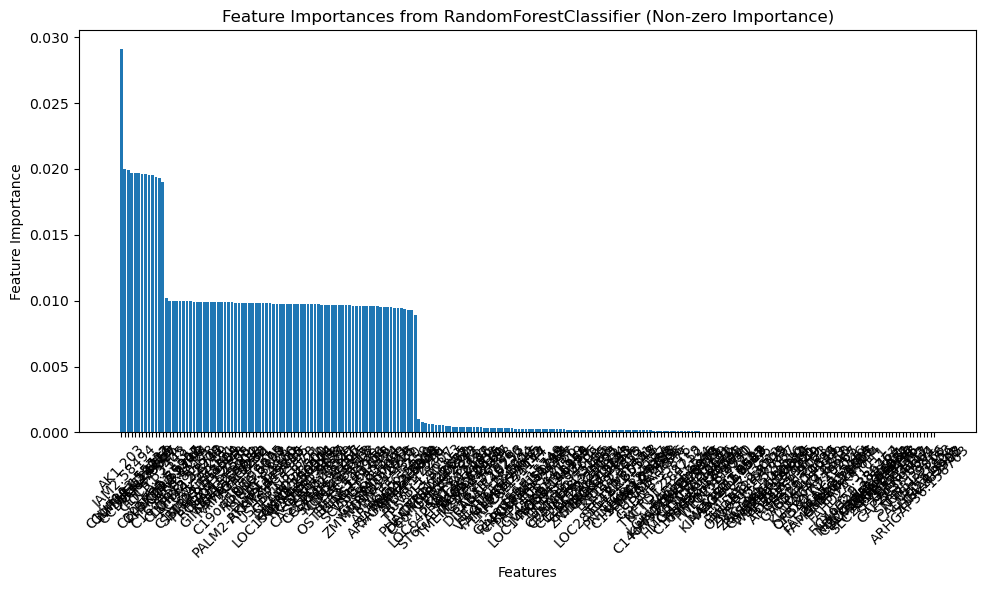

In [71]:
##########random forest##########

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
import numpy as np


forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

feature_importances = forest.feature_importances_

# print (feature_importances)

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]


# Print the feature importances
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(non_zero_indices)), feature_importances[non_zero_indices])
plt.xticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()


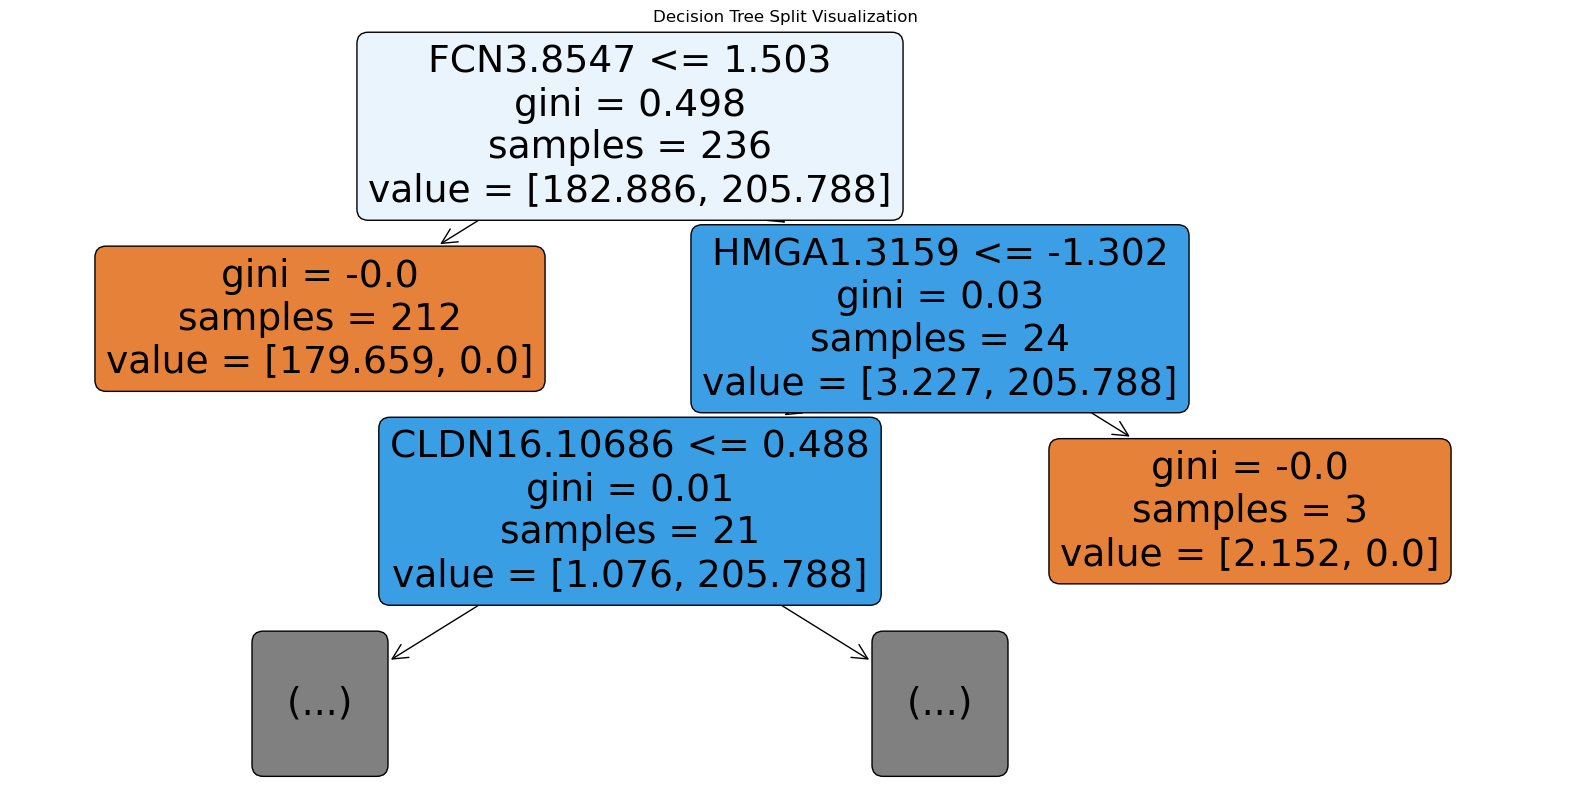

In [72]:
# Plot a single decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[1], feature_names=feature_names, filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree Split Visualization")
plt.show()

In [73]:
# import importlib
# importlib.reload(boruta)
from boruta import BorutaPy


# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2080
Rejected: 	18451
Iteration: 	9 / 100
Confirmed: 	319
Tentative: 	1761
Rejected: 	18451
Iteration: 	10 / 100
Confirmed: 	319
Tentative: 	1761
Rejected: 	18451
Iteration: 	11 / 100
Confirmed: 	319
Tentative: 	1761
Rejected: 	18451
Iteration: 	12 / 100
Confirmed: 	344
Tentative: 	1083
Rejected: 	19104
Iteration: 	13 / 100
Confirmed: 	344
Tentative: 	1083
Rejected: 	19104
Iteration: 	14 / 100
Confirmed: 	344
Tentative: 	1083
Rejected: 	19104
Iteration: 	15 / 100
Confirmed: 	344
Tentative: 	108

In [74]:
# # Our feature names
# print (feature_names)

# # True / false values for whether we should accept this feature
# print(feat_selector.support_) 

# # Ranking of the feature (with 1 being the bets)
# print(feat_selector.ranking_)

# Zip feature names, decision, and rankings 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: ..100130426                    Rank: 14818,  Keep: False
Feature: ..100133144                    Rank: 14818,  Keep: False
Feature: ..100134869                    Rank: 14818,  Keep: False
Feature: ..10357                        Rank: 4916,  Keep: False
Feature: ..10431                        Rank: 7318,  Keep: False
Feature: ..136542                       Rank: 14818,  Keep: False
Feature: ..155060                       Rank: 1824,  Keep: False
Feature: ..26823                        Rank: 14818,  Keep: False
Feature: ..280660                       Rank: 14818,  Keep: False
Feature: ..317712                       Rank: 14818,  Keep: False
Feature: ..340602                       Rank: 7318,  Keep: False
Feature: ..388795                       Rank: 4147,  Keep: False
Feature: ..390284                       Rank: 14818,  Keep: False
Feature: ..391343                       Rank: 14818,  Keep: False
Feature: ..391714                       Rank: 7318,  Keep: False
Feature: ..40477

In [75]:
features_true = []
features_true.append('Label')
for each in feature_ranks:
    if each[2] == True:
        features_true.append(each[0])




print(features_true)

['Label', 'A2M.2', 'ABCA3.21', 'ABCA8.10351', 'ABCC5.10057', 'ABCC6.368', 'ABI3BP.25890', 'ACE.1636', 'ACOXL.55289', 'ACVRL1.94', 'ADAMTS8.11095', 'ADH1B.125', 'AGER.177', 'AGRP.181', 'AK1.203', 'AKAP2.11217', 'ANGPT4.51378', 'ANGPTL1.9068', 'ANLN.54443', 'AOC3.8639', 'AQP1.358', 'AQP4.361', 'ARHGAP11A.9824', 'ARHGAP31.57514', 'ARHGAP6.395', 'ARHGEF15.22899', 'ARRB1.408', 'ASPA.443', 'AURKA.6790', 'BIRC5.332', 'BLM.641', 'BUB1B.701', 'C13orf15.28984', 'C15orf42.90381', 'C16orf59.80178', 'C16orf75.116028', 'C16orf89.146556', 'C17orf53.78995', 'C19orf59.199675', 'C1QTNF7.114905', 'C1orf112.55732', 'C1orf116.79098', 'C1orf135.79000', 'C20orf202.400831', 'C20orf20.55257', 'C20orf56.140828', 'C21orf45.54069', 'C4orf31.79625', 'C5orf4.10826', 'C9orf100.84904', 'C9orf140.89958', 'CA4.762', 'CACNA2D2.9254', 'CASP12.120329', 'CASS4.57091', 'CAT.847', 'CAV3.859', 'CCDC34.91057', 'CCDC48.79825', 'CCDC68.80323', 'CCDC85A.114800', 'CCNE1.898', 'CCNF.899', 'CCT3.7203', 'CCT5.22948', 'CD300LG.146894'

In [76]:
X_filtered.shape

(369, 350)

Accuracy =  0.6338797814207651


<Axes: >

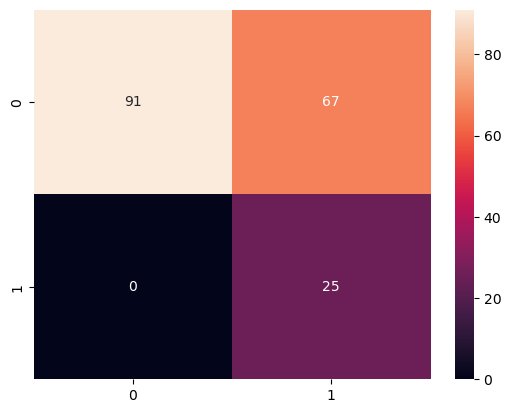

In [77]:
forest.fit(X_filtered, y_train)

#Now predict on test data using the trained model. 

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_forest = forest.predict(X_test_filtered)


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_forest))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_forest)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy (All Features) = 0.8633879781420765


<Axes: >

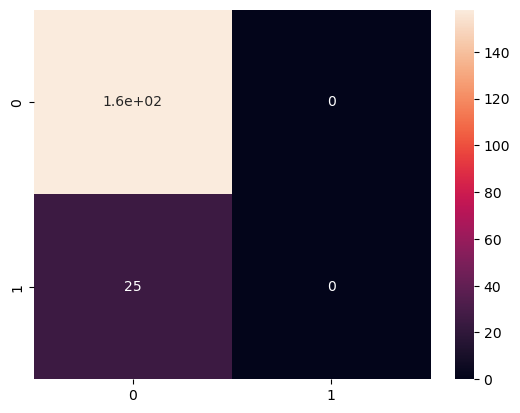

In [78]:
# Train the model with all features
forest.fit(X_train, y_train)

# Test the model with all features
prediction_forest_all = forest.predict(X_test)

# Print overall accuracy for the model with all features
print("Accuracy (All Features) =", metrics.accuracy_score(y_test, prediction_forest_all))

# Confusion Matrix for the model with all features
cm_all = confusion_matrix(y_test, prediction_forest_all)
sns.heatmap(cm_all, annot=True)

In [79]:

###useful to talk about the fact that we have a fairly small sample size so feature selection predictor does not have a lot of normal tissue to work with
#but we would expect normal and cancer tissues to be very different in expression anyway so the accuracy makes sense



#need now to subset original data to only include the features that were selected by boruta




#make sure that mystery data is subset to only contain the same features as the model is working on




In [80]:
# df1 = gene_exp

data_selectedFeatures = df.filter(features_true)
data_selectedFeatures #this is the original data using only the features selected by boruta




,Label,A2M.2,ABCA3.21,ABCA8.10351,ABCC5.10057,ABCC6.368,ABI3BP.25890,ACE.1636,ACOXL.55289,ACVRL1.94,...,UBE2S.27338,UBE2T.29089,UHRF1.29128,USHBP1.83878,VAMP2.6844,VEPH1.79674,VWF.7450,WWC2.80014,ZEB2.9839,ZWILCH.55055
0,Primary Tumor,9074.6772,195.2756,37.0079,1933.8583,24.4094,514.9606,375.5906,13.3858,521.2598,...,741.7323,753.5433,122.0472,16.5354,637.7953,19.6850,1403.1496,295.2756,607.8740,475.4016
1,Primary Tumor,11310.1713,1475.2617,58.9914,10058.9914,75.6422,216.4605,469.0771,8.0875,510.4662,...,632.2550,341.1037,916.2702,21.8839,986.2036,39.0105,2842.5309,285.4424,790.6755,401.8078
2,Primary Tumor,14678.8492,446.0922,61.6936,45697.7606,23.7283,171.4370,383.8054,6.5253,307.8748,...,202.8771,821.5928,64.6596,4.7457,1546.4927,43.8974,877.9475,284.7397,608.0380,468.6341
3,Primary Tumor,25126.0923,738.4615,110.2564,522.5641,52.8205,7452.3077,655.3846,2.5641,844.1026,...,252.3077,148.2051,114.3590,16.9231,1187.6923,37.4359,2901.0256,565.6410,1365.6410,375.8564
4,Primary Tumor,4292.9610,6030.7960,27.5721,1226.5625,5.9083,1150.1485,345.0446,42.1459,1247.8324,...,1954.8586,812.9817,729.8717,13.7860,651.8821,10.2410,880.7302,147.7074,687.7258,1523.4623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Primary Tumor,3629.9421,482.6159,12.0033,6279.3874,32.6987,218.5430,474.7517,5.7947,245.4470,...,2205.7119,1244.6192,1114.6440,4.1391,450.7450,0.8278,1927.1523,182.9470,544.2881,1074.4040
548,Primary Tumor,5406.0132,222.7125,22.6915,21455.6151,31.5159,274.3986,283.2230,1.6808,252.5475,...,1151.8017,519.8025,645.0257,9.2447,563.0844,5.4628,1322.4078,279.4411,543.7546,621.3552
549,Primary Tumor,5299.1080,472.3267,11.8216,12188.6083,62.8694,90.2740,340.6771,4.8361,186.9962,...,880.1720,676.5180,1020.9565,12.8963,513.7023,26.3299,1585.1693,52.6599,372.3804,598.6029
550,Primary Tumor,16530.5698,501.5974,1.5974,1328.5410,6.6560,19.9681,301.6507,2.3962,146.6986,...,1138.7114,641.3738,1891.0969,18.6368,590.5218,26.6241,589.1906,649.8935,122.2045,428.9217


In [81]:
data_selectedFeatures.to_csv('G5_lung_gene-expr_selected_features.csv')

In [82]:
###### load mystery data


mystery_gene_expr = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/mystery_gene-expr.csv')


mystery_filtered = mystery_gene_expr.filter(features_true)
mystery_filtered.to_csv('mystery_gene-expr_selected_features.csv')

mystery_gene_expr


,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,SYS1.DBNDD2.767557,TMED7.TICAM2.100302736,TMEM189.UBE2V1.387522,TNFSF12.TNFSF13.407977,TRIM6.TRIM34.445372,TSNAX.DISC1.100303453,VTRNA1.1.56664,VTRNA1.2.56663,VTRNA1.3.56662,ZFP91.CNTF.386607
0,TCGA.BH.A0EI.01,Primary Tumor,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA.EW.A1P4.01,Primary Tumor,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA.A2.A0CM.01,Primary Tumor,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA.AO.A12B.01,Primary Tumor,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA.E2.A576.01,Primary Tumor,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.56.7582.11,Solid Tissue Normal,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,TCGA.43.3394.11,Solid Tissue Normal,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,TCGA.92.7340.11,Solid Tissue Normal,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,TCGA.22.5471.11,Solid Tissue Normal,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
mystery_filtered

,Label,A2M.2,ABCA3.21,ABCA8.10351,ABCC5.10057,ABCC6.368,ABI3BP.25890,ACE.1636,ACOXL.55289,ACVRL1.94,...,UBE2S.27338,UBE2T.29089,UHRF1.29128,USHBP1.83878,VAMP2.6844,VEPH1.79674,VWF.7450,WWC2.80014,ZEB2.9839,ZWILCH.55055
0,Primary Tumor,9009.9228,3476.6319,7.3387,837.7752,1.9312,684.8204,1110.8536,8.8837,355.3496,...,234.8397,134.4148,346.0796,24.7200,1324.0633,148.3198,2698.3391,512.9394,771.3403,484.6504
1,Primary Tumor,4723.5308,223.6143,9.1116,959.7570,11.7692,102.8853,365.9833,6.0744,355.7327,...,1228.5497,386.8641,768.0296,11.3895,500.0000,354.2141,1754.3660,668.1853,479.4989,824.8785
2,Primary Tumor,7966.7244,1953.6172,17.0763,956.7324,3.2306,275.9894,302.7576,0.9230,440.2908,...,960.4246,921.6569,582.9007,18.9223,626.2836,34.6141,1752.8557,396.9078,868.5820,933.7949
3,Primary Tumor,5225.8928,16082.4611,8.0347,98.9534,85.8442,27.9099,530.7115,0.0000,227.5082,...,451.2105,517.6023,125.5947,32.9845,4727.3496,2.9601,1967.2270,237.6573,204.2499,210.4155
4,Primary Tumor,8859.9542,3453.7122,83.4097,1747.9377,34.8304,102.6581,244.2713,0.4583,582.4931,...,1575.1604,463.7947,625.5729,146.6544,1367.5527,0.9166,2299.2667,311.7736,181.0266,175.0687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Solid Tissue Normal,114424.9028,12942.4337,1200.7963,1231.7567,695.1103,3705.2573,7539.0167,78.5661,3317.0875,...,88.5533,41.2805,35.9540,300.2823,2498.1357,605.5582,76314.9835,2972.8614,3360.3654,220.2681
376,Solid Tissue Normal,77914.9708,32321.3744,1703.5557,567.6388,383.6996,4868.8773,4995.6053,309.3887,5599.5206,...,165.2417,33.7195,28.9253,254.8941,3240.4315,1330.0839,11699.0811,3902.0376,3325.2897,129.9241
377,Solid Tissue Normal,103940.0314,22393.0040,1523.5817,578.2196,473.5780,5545.1080,5264.9675,266.9856,4254.1296,...,42.1556,14.9488,6.8764,276.8518,2709.3206,1377.3825,30216.6081,6050.3775,3295.3136,179.9836
378,Solid Tissue Normal,88731.1344,27896.8322,1375.4281,431.0788,785.5308,2170.8048,5046.2329,291.0959,3671.2329,...,100.5993,36.8151,9.4178,198.2021,2932.7911,930.2226,20206.7637,2983.3048,2143.4075,139.1267


In [84]:
mystery_data_gene_full = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/mystery_gene-expr.csv')
mystery_data_gene_full

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,SYS1.DBNDD2.767557,TMED7.TICAM2.100302736,TMEM189.UBE2V1.387522,TNFSF12.TNFSF13.407977,TRIM6.TRIM34.445372,TSNAX.DISC1.100303453,VTRNA1.1.56664,VTRNA1.2.56663,VTRNA1.3.56662,ZFP91.CNTF.386607
0,TCGA.BH.A0EI.01,Primary Tumor,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA.EW.A1P4.01,Primary Tumor,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA.A2.A0CM.01,Primary Tumor,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA.AO.A12B.01,Primary Tumor,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA.E2.A576.01,Primary Tumor,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.56.7582.11,Solid Tissue Normal,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,TCGA.43.3394.11,Solid Tissue Normal,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,TCGA.92.7340.11,Solid Tissue Normal,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,TCGA.22.5471.11,Solid Tissue Normal,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
